In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from numpy import array

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/marketing-strategy-personalised-offer/sample.csv
/kaggle/input/marketing-strategy-personalised-offer/train_data.csv
/kaggle/input/marketing-strategy-personalised-offer/test_data.csv


In [2]:
train = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/train_data.csv')
test = pd.read_csv('/kaggle/input/marketing-strategy-personalised-offer/test_data.csv')

In [3]:
train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,4,67,less1,22,Spring,Location B,0,No
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,1,3,89,1~3,18,Summer,Location B,0,Yes
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,1,1,4,67,less1,7,Winter,Location A,1,Yes
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,1,3,89,1~3,7,Summer,Location C,0,No
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,1,0,3,40,less1,7,Summer,Location C,0,No


In [4]:
feature_list = train.columns[:-1].values
label = [train.columns[-1]]
print('Feature List:' ,feature_list)
print('Label:',label)

Feature List: ['offer expiration' 'income_range' 'no_visited_Cold drinks'
 'travelled_more_than_15mins_for_offer' 'Restaur_spend_less_than20'
 'Marital Status' 'restaurant type' 'age' 'Prefer western over chinese'
 'travelled_more_than_25mins_for_offer'
 'travelled_more_than_5mins_for_offer' 'no_visited_bars' 'gender' 'car'
 'restuarant_same_direction_house' 'Cooks regularly' 'Customer type'
 'Qualification' 'is foodie' 'no_Take-aways' 'Job/Job Industry'
 'restuarant_opposite_direction_house' 'has Children'
 'visit restaurant with rating (avg)' 'temperature'
 'Restaur_spend_greater_than20' 'Travel Time' 'Climate' 'drop location'
 'Prefer home food']
Label: ['Offer Accepted']


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12181 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  int64 
 4   Restaur_spend_less_than20             12258 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  int64 
 9   travelled_more_than_25mins_for_offer  12379 non-null  int64 
 10  travelled_more_than_5mins_for_offer   12379 non-null  int64 
 11  no_visited_bars             

In [6]:
train.isnull().sum()

offer expiration                            0
income_range                                0
no_visited_Cold drinks                    198
travelled_more_than_15mins_for_offer        0
Restaur_spend_less_than20                 121
Marital Status                              0
restaurant type                             0
age                                         0
Prefer western over chinese                 0
travelled_more_than_25mins_for_offer        0
travelled_more_than_5mins_for_offer         0
no_visited_bars                            93
gender                                      0
car                                     12268
restuarant_same_direction_house             0
Cooks regularly                             0
Customer type                               0
Qualification                               0
is foodie                                   0
no_Take-aways                             144
Job/Job Industry                            0
restuarant_opposite_direction_hous

In [7]:
X_train = train.iloc[: , :-1] #dropping last column of train
y_train = train.iloc[:, -1] #last column of train
X_test = test

In [8]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy="most_frequent")
X_train_=im.fit_transform(X_train)
X_train_

array([['2days', '₹100000 or More', '4~8', ..., 'Spring', 'Location B',
        0],
       ['2days', '₹87500 - ₹99999', '4~8', ..., 'Summer', 'Location B',
        0],
       ['2days', '₹87500 - ₹99999', 'less1', ..., 'Winter', 'Location A',
        1],
       ...,
       ['10hours', '₹87500 - ₹99999', '4~8', ..., 'Spring', 'Location B',
        1],
       ['10hours', '₹12500 - ₹24999', '4~8', ..., 'Summer', 'Location C',
        0],
       ['2days', '₹37500 - ₹49999', '1~3', ..., 'Spring', 'Location A',
        1]], dtype=object)

In [9]:
from sklearn.impute import SimpleImputer
im = SimpleImputer(strategy="most_frequent")
X_test_=im.fit_transform(X_test)
X_test_

array([['2days', '₹37500 - ₹49999', '1~3', ..., 'Summer', 'Location C',
        0],
       ['10hours', '₹25000 - ₹37499', '4~8', ..., 'Summer', 'Location A',
        1],
       ['2days', '₹100000 or More', 'never', ..., 'Summer', 'Location C',
        0],
       ...,
       ['10hours', '₹50000 - ₹62499', 'gt8', ..., 'Summer', 'Location C',
        1],
       ['2days', '₹50000 - ₹62499', '1~3', ..., 'Summer', 'Location A',
        0],
       ['2days', '₹37500 - ₹49999', 'less1', ..., 'Winter', 'Location A',
        0]], dtype=object)

In [10]:
X_train.columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food'],
      dtype='object')

In [11]:
X_train = pd.DataFrame(X_train_,columns= ['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food'])
X_test= pd.DataFrame(X_test_,columns= ['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'travelled_more_than_15mins_for_offer', 'Restaur_spend_less_than20',
       'Marital Status', 'restaurant type', 'age',
       'Prefer western over chinese', 'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer', 'no_visited_bars', 'gender',
       'car', 'restuarant_same_direction_house', 'Cooks regularly',
       'Customer type', 'Qualification', 'is foodie', 'no_Take-aways',
       'Job/Job Industry', 'restuarant_opposite_direction_house',
       'has Children', 'visit restaurant with rating (avg)', 'temperature',
       'Restaur_spend_greater_than20', 'Travel Time', 'Climate',
       'drop location', 'Prefer home food'])

In [12]:
#number of unique values in the features
feature_values = {}
for feature in feature_list:
    feature_values[feature]= X_train[feature].unique()
    print(feature, ':', len(X_train[feature].unique()))

offer expiration : 2
income_range : 9
no_visited_Cold drinks : 5
travelled_more_than_15mins_for_offer : 2
Restaur_spend_less_than20 : 5
Marital Status : 5
restaurant type : 5
age : 8
Prefer western over chinese : 2
travelled_more_than_25mins_for_offer : 2
travelled_more_than_5mins_for_offer : 1
no_visited_bars : 5
gender : 2
car : 5
restuarant_same_direction_house : 2
Cooks regularly : 2
Customer type : 4
Qualification : 6
is foodie : 2
no_Take-aways : 5
Job/Job Industry : 25
restuarant_opposite_direction_house : 2
has Children : 2
visit restaurant with rating (avg) : 5
temperature : 3
Restaur_spend_greater_than20 : 5
Travel Time : 5
Climate : 3
drop location : 3
Prefer home food : 2


In [13]:
y_train.value_counts()/len(y_train)

Yes    0.564989
No     0.435011
Name: Offer Accepted, dtype: float64

In [14]:
X_train['no_visited_Cold drinks'].astype('str')
X_train['Restaur_spend_less_than20'].astype('str')
X_train['no_visited_bars'].astype('str')
X_train['no_Take-aways'].astype('str')
X_train['Restaur_spend_greater_than20'].astype('str')

0        less1
1          1~3
2        less1
3          1~3
4        less1
         ...  
12374    never
12375    never
12376      gt8
12377    less1
12378    less1
Name: Restaur_spend_greater_than20, Length: 12379, dtype: object

In [15]:
X_train['Job/Job Industry'].value_counts().sort_values(ascending = False)

Unemployed                                   1838
Student                                      1520
Computer & Mathematical                      1361
Sales & Related                              1075
Education&Training&Library                    944
Management                                    842
Arts Design Entertainment Sports & Media      646
Office & Administrative Support               631
Business & Financial                          486
Retired                                       462
Food Preparation & Serving Related            281
Healthcare Practitioners & Technical          246
Transportation & Material Moving              235
Community & Social Services                   230
Healthcare Support                            223
Legal                                         216
Protective Service                            183
Life Physical Social Science                  175
Personal Care & Service                       165
Architecture & Engineering                    153


In [16]:
Jdummies = X_train['Job/Job Industry'].str.get_dummies(sep='&')
Jdummies.head()

,Administrative Support,Engineering,Extraction,Financial,Forestry,Grounds Cleaning,Maintenance,Material Moving,Mathematical,Media,...,Office,Personal Care,Production Occupations,Protective Service,Retired,Sales,Student,Training,Transportation,Unemployed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [17]:
Jdummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0    Administrative Support            12379 non-null  int64
 1    Engineering                       12379 non-null  int64
 2    Extraction                        12379 non-null  int64
 3    Financial                         12379 non-null  int64
 4    Forestry                          12379 non-null  int64
 5    Grounds Cleaning                  12379 non-null  int64
 6    Maintenance                       12379 non-null  int64
 7    Material Moving                   12379 non-null  int64
 8    Mathematical                      12379 non-null  int64
 9    Media                             12379 non-null  int64
 10   Related                           12379 non-null  int64
 11   Repair                            12379 non-null  int64
 12   Service          

In [18]:
Jdummies.columns

Index([' Administrative Support', ' Engineering', ' Extraction', ' Financial',
       ' Forestry', ' Grounds Cleaning ', ' Maintenance', ' Material Moving',
       ' Mathematical', ' Media', ' Related', ' Repair', ' Service',
       ' Serving Related', ' Social Services', ' Technical', 'Architecture ',
       'Arts Design Entertainment Sports ', 'Building ', 'Business ',
       'Community ', 'Computer ', 'Construction ', 'Education',
       'Farming Fishing ', 'Food Preparation ', 'Healthcare Practitioners ',
       'Healthcare Support', 'Installation Maintenance ', 'Legal', 'Library',
       'Life Physical Social Science', 'Management', 'Office ',
       'Personal Care ', 'Production Occupations', 'Protective Service',
       'Retired', 'Sales ', 'Student', 'Training', 'Transportation ',
       'Unemployed'],
      dtype='object')

In [19]:
X_train = pd.concat([X_train, Jdummies], axis=1)
X_train.drop(['Job/Job Industry'],axis=1,inplace=True)
X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Office,Personal Care,Production Occupations,Protective Service,Retired,Sales,Student,Training,Transportation,Unemployed
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,0,0,0,0,0,1,0,0,0,0


In [20]:
X_train.shape

(12379, 72)

In [21]:
X_train.drop(['travelled_more_than_5mins_for_offer','car'],axis=1,inplace=True)  
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      12379 non-null  object
 1   income_range                          12379 non-null  object
 2   no_visited_Cold drinks                12379 non-null  object
 3   travelled_more_than_15mins_for_offer  12379 non-null  object
 4   Restaur_spend_less_than20             12379 non-null  object
 5   Marital Status                        12379 non-null  object
 6   restaurant type                       12379 non-null  object
 7   age                                   12379 non-null  object
 8   Prefer western over chinese           12379 non-null  object
 9   travelled_more_than_25mins_for_offer  12379 non-null  object
 10  no_visited_bars                       12379 non-null  object
 11  gender                      

In [22]:
Jdummies_test = X_test['Job/Job Industry'].str.get_dummies(sep='&')
Jdummies_test.head()

,Administrative Support,Engineering,Extraction,Financial,Forestry,Grounds Cleaning,Maintenance,Material Moving,Mathematical,Media,...,Office,Personal Care,Production Occupations,Protective Service,Retired,Sales,Student,Training,Transportation,Unemployed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [23]:
Jdummies_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 43 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0    Administrative Support            5305 non-null   int64
 1    Engineering                       5305 non-null   int64
 2    Extraction                        5305 non-null   int64
 3    Financial                         5305 non-null   int64
 4    Forestry                          5305 non-null   int64
 5    Grounds Cleaning                  5305 non-null   int64
 6    Maintenance                       5305 non-null   int64
 7    Material Moving                   5305 non-null   int64
 8    Mathematical                      5305 non-null   int64
 9    Media                             5305 non-null   int64
 10   Related                           5305 non-null   int64
 11   Repair                            5305 non-null   int64
 12   Service            

In [24]:
X_test = pd.concat([X_test, Jdummies_test], axis=1)
X_test.drop(['Job/Job Industry'],axis=1,inplace=True)
X_test.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Office,Personal Care,Production Occupations,Protective Service,Retired,Sales,Student,Training,Transportation,Unemployed
0,2days,₹37500 - ₹49999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,...,0,0,0,0,0,1,0,0,0,0
1,10hours,₹25000 - ₹37499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,...,0,0,0,0,0,0,0,0,0,0
2,2days,₹100000 or More,never,1,never,Single,Cold drinks,21,1,0,...,0,0,0,0,0,0,0,0,0,1
3,2days,₹25000 - ₹37499,never,1,1~3,Married partner,Restaurant with pub,41,0,0,...,0,0,0,0,0,0,0,0,0,1
4,10hours,₹12500 - ₹24999,never,0,1~3,Single,2 star restaurant,31,1,0,...,0,0,0,0,0,0,0,0,0,1


In [25]:
X_test.shape

(5305, 72)

In [26]:
X_test.drop(['travelled_more_than_5mins_for_offer','car'],axis=1,inplace=True)  
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5305 entries, 0 to 5304
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      5305 non-null   object
 1   income_range                          5305 non-null   object
 2   no_visited_Cold drinks                5305 non-null   object
 3   travelled_more_than_15mins_for_offer  5305 non-null   object
 4   Restaur_spend_less_than20             5305 non-null   object
 5   Marital Status                        5305 non-null   object
 6   restaurant type                       5305 non-null   object
 7   age                                   5305 non-null   object
 8   Prefer western over chinese           5305 non-null   object
 9   travelled_more_than_25mins_for_offer  5305 non-null   object
 10  no_visited_bars                       5305 non-null   object
 11  gender                        

In [27]:
X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,...,Office,Personal Care,Production Occupations,Protective Service,Retired,Sales,Student,Training,Transportation,Unemployed
0,2days,₹100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2days,₹87500 - ₹99999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2days,₹87500 - ₹99999,less1,1,1~3,Single,Cold drinks,26,1,0,...,0,0,0,0,0,0,0,0,0,0
3,10hours,₹37500 - ₹49999,less1,0,1~3,Single,Take-away restaurant,46,1,0,...,0,0,0,0,0,1,0,0,0,0
4,2days,₹100000 or More,never,1,1~3,Single,4 star restaurant,21,0,1,...,0,0,0,0,0,1,0,0,0,0


In [28]:
cat_feat = []
for i in X_train.columns:
    if (X_train[i].dtype=='object'):
        cat_feat.append(i)
print("Categorical Attribute : {}\n ".format(len(cat_feat)))
for j in range(len(cat_feat)): 
    print(cat_feat[j])

Categorical Attribute : 27
 
offer expiration
income_range
no_visited_Cold drinks
travelled_more_than_15mins_for_offer
Restaur_spend_less_than20
Marital Status
restaurant type
age
Prefer western over chinese
travelled_more_than_25mins_for_offer
no_visited_bars
gender
restuarant_same_direction_house
Cooks regularly
Customer type
Qualification
is foodie
no_Take-aways
restuarant_opposite_direction_house
has Children
visit restaurant with rating (avg)
temperature
Restaur_spend_greater_than20
Travel Time
Climate
drop location
Prefer home food


In [29]:
num_feat = []
for i in X_train.columns:
    if (X_train[i].dtype!='object'):
        num_feat.append(i)
print("Numerical Attribute : {}\n ".format(len(num_feat)))
for j in range(len(num_feat)): 
    print(num_feat[j])

Numerical Attribute : 43
 
 Administrative Support
 Engineering
 Extraction
 Financial
 Forestry
 Grounds Cleaning 
 Maintenance
 Material Moving
 Mathematical
 Media
 Related
 Repair
 Service
 Serving Related
 Social Services
 Technical
Architecture 
Arts Design Entertainment Sports 
Building 
Business 
Community 
Computer 
Construction 
Education
Farming Fishing 
Food Preparation 
Healthcare Practitioners 
Healthcare Support
Installation Maintenance 
Legal
Library
Life Physical Social Science
Management
Office 
Personal Care 
Production Occupations
Protective Service
Retired
Sales 
Student
Training
Transportation 
Unemployed


In [30]:
from sklearn.preprocessing import OrdinalEncoder

In [31]:
time_order = [['10hours', '2days']]
income_order = [['Less than ₹12500','₹12500 - ₹24999','₹25000 - ₹37499','₹37500 - ₹49999','₹50000 - ₹62499','₹62500 - ₹74999','₹75000 - ₹87499','₹87500 - ₹99999','₹100000 or More']]
freq_order = [['never', 'less1', '1~3', '4~8','gt8']]
age_order = [['below21','21',"26", "31","36","41", "46", "50plus"]]
edu_order = [['Some High School','High School Graduate','Some college - no degree','Associates degree','Bachelors degree','Graduate degree (Masters or Doctorate)']]

In [32]:
enc = OrdinalEncoder(categories=time_order)

X_train[['offer expiration']] = enc.fit_transform(X_train[['offer expiration']])
X_test[['offer expiration']] = enc.fit_transform(X_test[['offer expiration']])

In [33]:
enc = OrdinalEncoder(categories=income_order)

X_train[['income_range']] = enc.fit_transform(X_train[['income_range']])
X_test[['income_range']] = enc.fit_transform(X_test[['income_range']])

In [34]:
enc = OrdinalEncoder(categories=freq_order)

X_train[['no_visited_Cold drinks']] = enc.fit_transform(X_train[['no_visited_Cold drinks']])
X_test[['no_visited_Cold drinks']] = enc.fit_transform(X_test[['no_visited_Cold drinks']])

X_train[['Restaur_spend_less_than20']] = enc.fit_transform(X_train[['Restaur_spend_less_than20']])
X_test[['Restaur_spend_less_than20']] = enc.fit_transform(X_test[['Restaur_spend_less_than20']])

X_train[['no_visited_bars']] = enc.fit_transform(X_train[['no_visited_bars']])
X_test[['no_visited_bars']] = enc.fit_transform(X_test[['no_visited_bars']])

X_train[['no_Take-aways']] = enc.fit_transform(X_train[['no_Take-aways']])
X_test[['no_Take-aways']] = enc.fit_transform(X_test[['no_Take-aways']])

X_train[['Restaur_spend_greater_than20']] = enc.fit_transform(X_train[['Restaur_spend_greater_than20']])
X_test[['Restaur_spend_greater_than20']] = enc.fit_transform(X_test[['Restaur_spend_greater_than20']])

In [35]:
enc = OrdinalEncoder(categories=age_order)

X_train[['age']] = enc.fit_transform(X_train[['age']])
X_test[['age']] = enc.fit_transform(X_test[['age']])

In [36]:
enc = OrdinalEncoder(categories=edu_order)

X_train[['Qualification']] = enc.fit_transform(X_train[['Qualification']])
X_test[['Qualification']] = enc.fit_transform(X_test[['Qualification']])

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12379 entries, 0 to 12378
Data columns (total 70 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   offer expiration                      12379 non-null  float64
 1   income_range                          12379 non-null  float64
 2   no_visited_Cold drinks                12379 non-null  float64
 3   travelled_more_than_15mins_for_offer  12379 non-null  object 
 4   Restaur_spend_less_than20             12379 non-null  float64
 5   Marital Status                        12379 non-null  object 
 6   restaurant type                       12379 non-null  object 
 7   age                                   12379 non-null  float64
 8   Prefer western over chinese           12379 non-null  object 
 9   travelled_more_than_25mins_for_offer  12379 non-null  object 
 10  no_visited_bars                       12379 non-null  float64
 11  gender         

In [38]:
Mdummies = X_train['Marital Status'].str.get_dummies(sep='&')
Rdummies = X_train['restaurant type'].str.get_dummies(sep= '&')
Gdummies = X_train['gender'].str.get_dummies(sep= '&')
Cstmrdummies = X_train['Customer type'].str.get_dummies(sep= '&')
Clmtdummies = X_train['Climate'].str.get_dummies(sep= '&')
Ldummies = X_train['drop location'].str.get_dummies(sep= '&')

In [39]:
X_train = pd.concat([X_train, Mdummies], axis=1)
X_train = pd.concat([X_train, Rdummies], axis=1)
X_train = pd.concat([X_train, Gdummies], axis=1)
X_train = pd.concat([X_train, Cstmrdummies], axis=1)
X_train = pd.concat([X_train, Clmtdummies], axis=1)
X_train = pd.concat([X_train, Ldummies], axis=1)

X_train.drop(['Marital Status'],axis=1,inplace=True)
X_train.drop(['restaurant type'],axis=1,inplace=True)
X_train.drop(['gender'],axis=1,inplace=True)
X_train.drop(['Customer type'],axis=1,inplace=True)
X_train.drop(['Climate'],axis=1,inplace=True)
X_train.drop(['drop location'],axis=1,inplace=True)

X_train.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,restuarant_same_direction_house,...,Individual,With Colleagues,With Family,With Kids,Spring,Summer,Winter,Location A,Location B,Location C
0,1.0,8.0,3.0,1,1.0,4.0,0,0,1.0,0,...,1,0,0,0,1,0,0,0,1,0
1,1.0,7.0,3.0,0,3.0,7.0,0,0,0.0,1,...,1,0,0,0,0,1,0,0,1,0
2,1.0,7.0,1.0,1,2.0,2.0,1,0,0.0,1,...,1,0,0,0,0,0,1,1,0,0
3,0.0,3.0,1.0,0,2.0,6.0,1,0,0.0,1,...,1,0,0,0,0,1,0,0,0,1
4,1.0,8.0,0.0,1,2.0,1.0,0,1,1.0,0,...,1,0,0,0,0,1,0,0,0,1


In [40]:
Mdummies = X_test['Marital Status'].str.get_dummies(sep='&')
Rdummies = X_test['restaurant type'].str.get_dummies(sep= '&')
Gdummies = X_test['gender'].str.get_dummies(sep= '&')
Cstmrdummies = X_test['Customer type'].str.get_dummies(sep= '&')
Clmtdummies = X_test['Climate'].str.get_dummies(sep= '&')
Ldummies = X_test['drop location'].str.get_dummies(sep= '&')

In [41]:
X_test = pd.concat([X_test, Mdummies], axis=1)
X_test = pd.concat([X_test, Rdummies], axis=1)
X_test = pd.concat([X_test, Gdummies], axis=1)
X_test = pd.concat([X_test, Cstmrdummies], axis=1)
X_test = pd.concat([X_test, Clmtdummies], axis=1)
X_test = pd.concat([X_test, Ldummies], axis=1)

X_test.drop(['Marital Status'],axis=1,inplace=True)
X_test.drop(['restaurant type'],axis=1,inplace=True)
X_test.drop(['gender'],axis=1,inplace=True)
X_test.drop(['Customer type'],axis=1,inplace=True)
X_test.drop(['Climate'],axis=1,inplace=True)
X_test.drop(['drop location'],axis=1,inplace=True)

X_test.head()

,offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,no_visited_bars,restuarant_same_direction_house,...,Individual,With Colleagues,With Family,With Kids,Spring,Summer,Winter,Location A,Location B,Location C
0,1.0,3.0,2.0,1,2.0,7.0,0,1,1.0,0,...,1,0,0,0,0,1,0,0,0,1
1,0.0,2.0,3.0,0,2.0,1.0,1,0,4.0,0,...,1,0,0,0,0,1,0,1,0,0
2,1.0,8.0,0.0,1,0.0,1.0,1,0,0.0,0,...,1,0,0,0,0,1,0,0,0,1
3,1.0,2.0,0.0,1,2.0,5.0,0,0,0.0,0,...,1,0,0,0,1,0,0,0,0,1
4,0.0,1.0,0.0,0,2.0,3.0,1,0,0.0,1,...,0,0,1,0,0,1,0,0,1,0


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=19, min_samples_leaf= 5,
                            n_estimators=185, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=19, min_samples_leaf=5, n_estimators=185,
                       n_jobs=-1, oob_score=True, random_state=42)

In [44]:
y_test = rf.predict(X_test)

In [45]:
y_test=pd.DataFrame(y_test)

In [66]:
from sklearn.tree import DecisionTreeClassifier

In [68]:
dc = DecisionTreeClassifier(max_depth=3)
dc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [72]:
(dc.apply(X_train))

112560

In [46]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [18,19,20],
    'min_samples_leaf': [5,6,7],
    'n_estimators': [180,185,190],
}

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
grid = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [49]:
grid.fit(X_train, y_train)
grid.best_params_

Fitting 4 folds for each of 27 candidates, totalling 108 fits


{'max_depth': 20, 'min_samples_leaf': 5, 'n_estimators': 190}

In [50]:
grid.best_params_
grid_pred = grid.predict(X_test)

In [51]:
grid.best_score_

0.6334115589817386

In [52]:
y_predict=pd.DataFrame(grid.predict(X_test))

In [53]:
y_pred=grid.predict(X_test)
ans = pd.DataFrame()
ans['id'] = [i for i in range(X_test.shape[0])]
ans['Offer Accepted'] = y_pred
ans.to_csv(r'/kaggle/working/submission.csv',index=False)

In [60]:
from sklearn import metrics

In [61]:
confusion_matrix = metrics.confusion_matrix(y_test, grid_pred)

In [62]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

In [64]:
import matplotlib.pyplot as plt

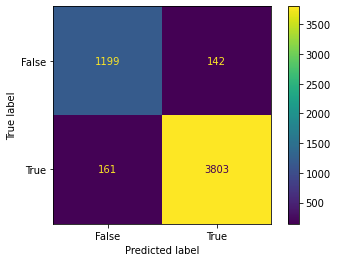

In [65]:
cm_display.plot()
plt.show()